## lab6
-------

Реализовать порядково-статистический фильтр и проиллюстрировать результаты его применения для бинарных и полутоновых изображений и квадратных окон размера 3x3, 5x5, 7x7

In [70]:
from skimage import morphology as skmo
import numpy as np

from skimage import data, io, filters
import matplotlib.pyplot as plt
from IPython.display import display as dis
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.morphology import diamond
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from matplotlib import cm


def plot(image):
    
    plt.imshow(image, cmap=cm.binary)
    plt.show()
    
    
def plot_results(i1,i2, i3):
    fig, (ax0,ax1, ax2 )= plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    ax0.imshow(i1, cmap=cm.binary)
    ax0.set_xlabel("окно 3х3")

    ax1.imshow(i2, cmap=cm.binary)
    ax1.set_xlabel("окно 5х5")
    
    ax2.imshow(i3, cmap=cm.binary)
    ax2.set_xlabel("окно 7х7")


###  матричные фильтры

In [93]:
def binary_intersection(image, structElem, x0, y0):
    res  = 0
    window_size = int((len(structElem) - 1) / 2)
    for i in range(len(structElem)):
        for j in range(len(structElem)):
            x = x0 - window_size + i
            y = y0 - window_size + j
            if( x >= 0 and y >= 0 and x < len(image) and y < len(image[0])):
                res += ((image[x][y] == 255  and structElem[i][j] == 1) or  (image[x][y] == True  and structElem[i][j] == 1))
    return res

In [85]:
def binary_filtration(image, structElem, k):
    result = numpy.zeros((len(image), len(image[0])))
    for i in range(len(image)):
        for j in range(len(image[0])):
           
            result[i][j] = (binary_intersection(image, structElem, i, j) >= k)
            
    return result
    

In [74]:
def halftone_intersection(image, structElem, x0, y0, k):
    res  = []
    window_size = int((len(structElem) - 1) / 2)
    for i in range(len(structElem)):
        for j in range(len(structElem)):
            x = x0 -  window_size + i
            y = y0 -  window_size + j
            if(structElem[i][j] == 1):
                if( x >= 0 and y >= 0 and x < len(image) and y < len(image[0])):
                    res.append(image[x][y])
                else:
                    res.append(0)
                    
    return numpy.partition(numpy.asarray(res), int(numpy.sum(structElem)) - k)[int(numpy.sum(structElem)) - k]

In [75]:
def halftone_filtration(image, structElem, k):
    result = numpy.zeros((len(image), len(image[0])))
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            result[i][j] = halftone_intersection(image, structElem, i, j, k)
            

    return result

### результат на бинарных изображениях

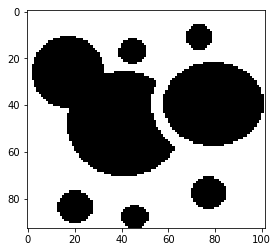

In [25]:
bin_image = img_as_ubyte(io.imread('images/i1.png', as_binary = True))[:,:,0]
plot(bin_image)

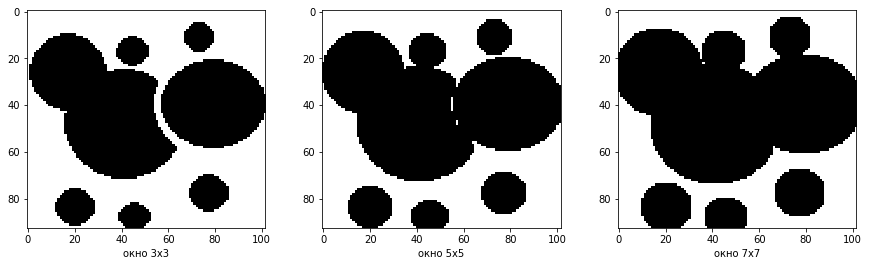

In [76]:
struct1= numpy.ones((3,3))
struct2 = numpy.ones((5,5))
struct3 = numpy.ones((7,7))


filter1 = binary_filtration(bin_image, struct1, 2)


filter2 = binary_filtration(bin_image, struct2, 2)


filter3 = binary_filtration(bin_image, struct3, 2)

plot_results(filter1, filter2, filter3)

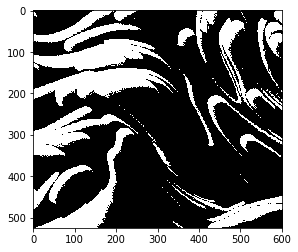

In [91]:
bin_image = img_as_ubyte(io.imread('images/img4.png', as_binary = True))[:,:,0] > 150 
plot(bin_image)

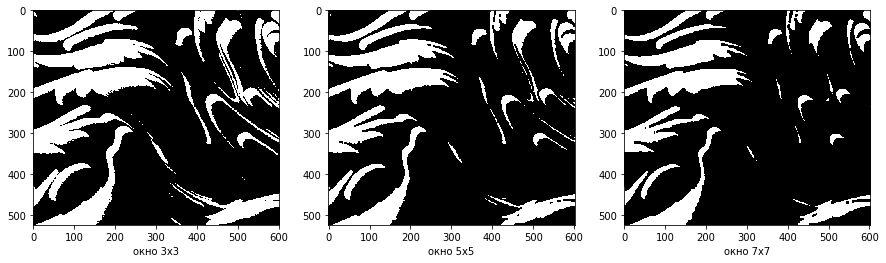

In [94]:
filter1 = binary_filtration(bin_image, struct1, 5)


filter2 = binary_filtration(bin_image, struct2, 5)


filter3 = binary_filtration(bin_image, struct3, 5)

plot_results(filter1, filter2, filter3)

### результат на полутоновых изображениях

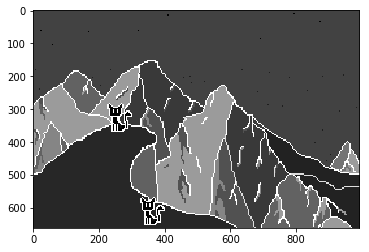

In [98]:
from PIL import Image
im = np.array(Image.open('images/img1.png'))
image_gray = im[:,:,2]
plot(image_gray)

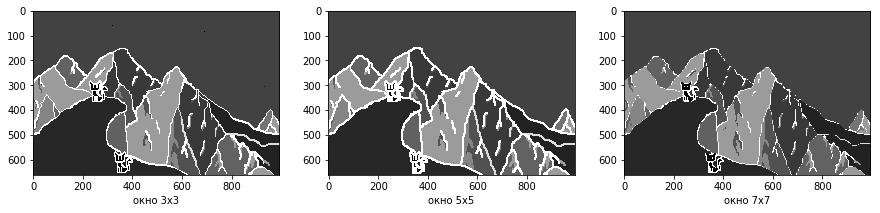

In [99]:
filter4 = halftone_filtration(image_gray, struct1, 9)
filter5 = halftone_filtration(image_gray, struct2, 25)
filter6 = halftone_filtration(image_gray, struct3, 49)


plot_results(filter4, filter5, filter6)

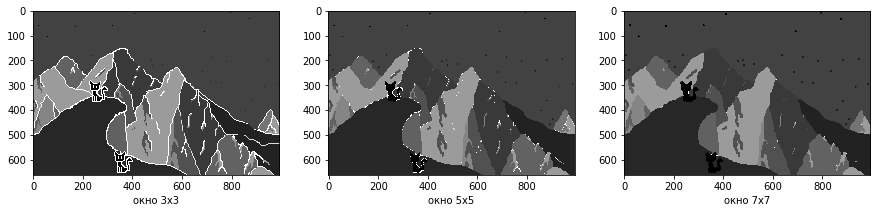

In [100]:
filter4 = halftone_filtration(image_gray, struct1, 5)
filter5 = halftone_filtration(image_gray, struct2, 5)
filter6 = halftone_filtration(image_gray, struct3, 5)


plot_results(filter4, filter5, filter6)

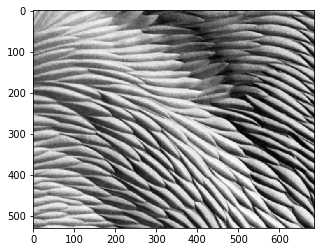

In [102]:
im = np.array(Image.open('images/img3.png'))
image_gray = im[:,:,2]
plot(image_gray)

In [ ]:
filter4 = halftone_filtration(image_gray, struct1, 9)
filter5 = halftone_filtration(image_gray, struct2, 25)
filter6 = halftone_filtration(image_gray, struct3, 49)

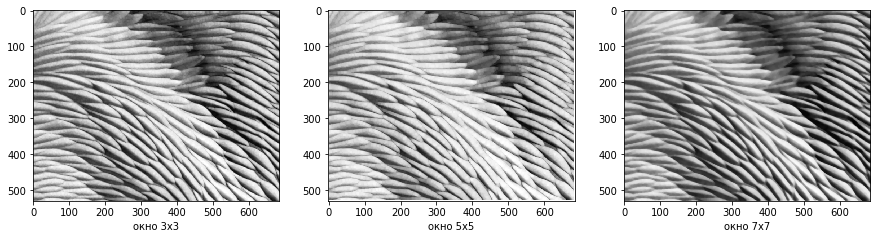

In [97]:
plot_results(filter4, filter5, filter6)

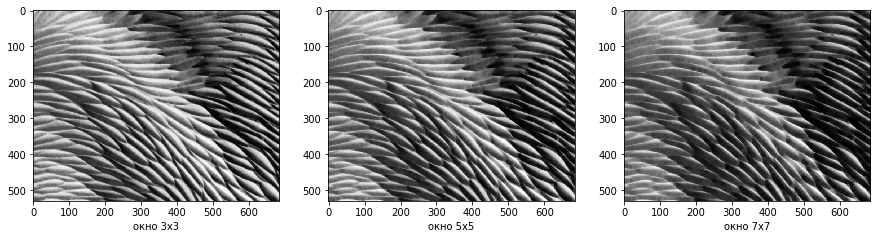

In [103]:
filter4 = halftone_filtration(image_gray, struct1, 1)
filter5 = halftone_filtration(image_gray, struct2, 1)
filter6 = halftone_filtration(image_gray, struct3, 1)


plot_results(filter4, filter5, filter6)